<a href="https://colab.research.google.com/github/MuhammadIqbal233/Minggu2_PCVK/blob/main/minggu_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.


In [8]:
import cv2 as cv
import pytesseract
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
from google.colab import drive


drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [9]:
# memuat file gambar
image_file = ('/content/drive/MyDrive/PCVK/img/gradient.jpg')

# membaca gambar
image = cv.imread(image_file)

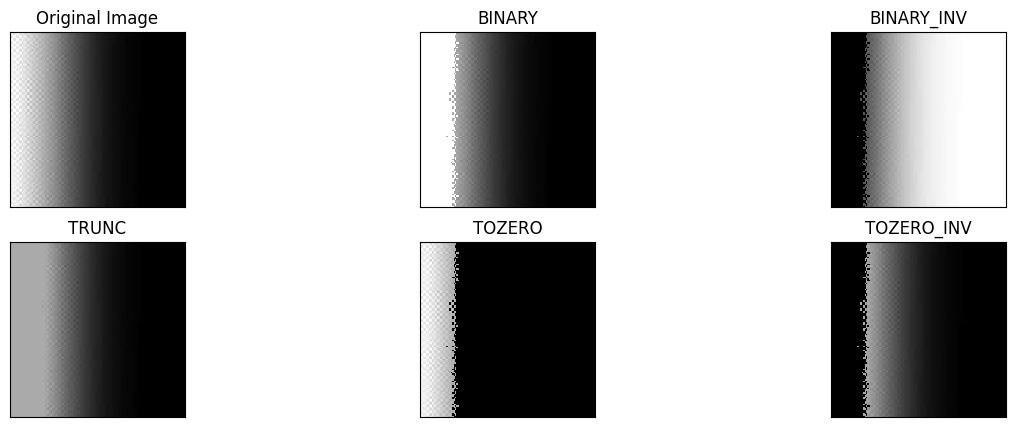

In [11]:
# melakukan proses thresholding
thresh1 = cv.imread(image_file)
thresh2 = cv.imread(image_file)
thresh3 = cv.imread(image_file)
thresh4 = cv.imread(image_file)
thresh5 = cv.imread(image_file)

# menetapkan nilai treshold
thresh = 170

"""
  1. melakukan pengecekan, jika nilai pixel di gambar lebih besar dari nilai threshold
  maka nilai dari thresh1 bernilai 1 dan lainnya bernilai 0
"""
thresh1[image > thresh] = 255 # jika keadaan benar, akan bernilai 1 (putih)
thresh2[image <= thresh] = 0  # jika keadaan benar, akan bernilai 0 (hitam)

# 2. threshold inverse
thresh2 = 255 - thresh1

# 3. threshold truncate
thresh3[image > thresh] = thresh

# 4. threshold to zero
thresh4[image <= thresh] = 0

# 5. threshold to zero inverse
thresh5[image > thresh] = 0

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [image, thresh1, thresh2, thresh3, thresh4, thresh5]

# memnentukan ukuran figure
plt.figure(figsize = (15,5))

# menggunakan looping untuk proses ploting
for i in range(len(images)):
  plt.subplot(2,3,i+1),
  plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

# menampilkan hasilnya
plt.show()

In [12]:
image_file = ('/content/drive/MyDrive/PCVK/img/ktp.jpg')
image = cv.imread(image_file, 0)
blur = cv.GaussianBlur(image,(5,5),0)


In [13]:
def otsu(gray):
  pixel_number = gray.shape[0] * gray.shape[1]
  mean_weight = 1.0/pixel_number
  his, bins = np.histogram(gray, np.arange(0,257))
  final_thresh = -1
  final_value = -1
  intensity_arr = np.arange(256)

  for t in bins[1:-1]:
    pcb = np.sum(his[:t])
    pcf = np.sum(his[t:])
    Wb = pcb * mean_weight
    Wf = pcf * mean_weight
    mub = np.sum(intensity_arr[:t]*his[:t]) / float(pcb)
    muf = np.sum(intensity_arr[t:]*his[t:]) / float(pcf)

    value = Wb * Wf * (mub - muf) ** 2
    if value > final_value:
      final_thresh = t
      final_value = value

  final_image = gray.copy()
  print(final_thresh)
  final_image[gray > final_thresh] = 255
  final_image[gray < final_thresh] = 0

  return final_image, final_thresh


140


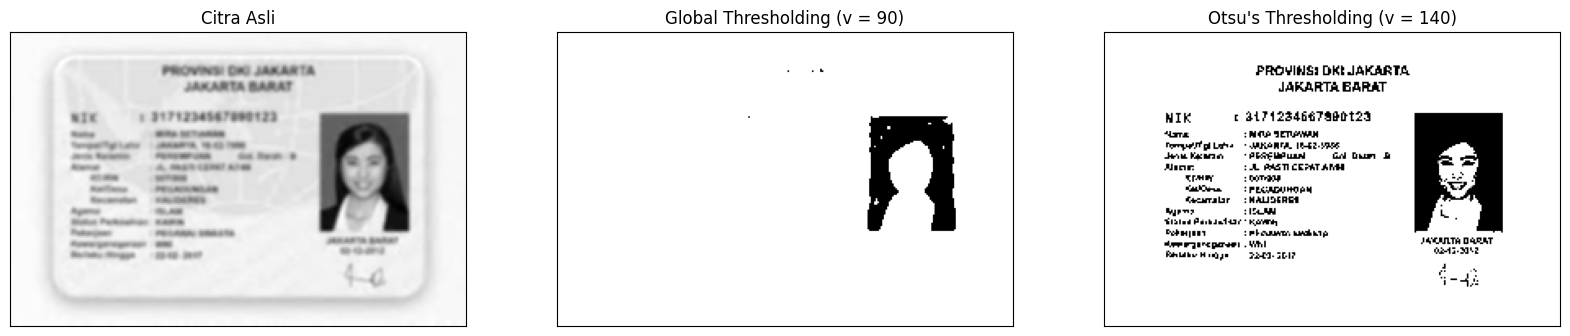

In [14]:
otsu_biner, otsu_thresh = otsu(image)
x = ("Otsu's Thresholding (v = ")+str(otsu_thresh)+")"
ret,th1 = cv.threshold(blur,90,255,cv.THRESH_BINARY)

titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, otsu_biner]
plt.figure(figsize = (20,15))

for i in range(len(citra3)):
  plt.subplot(1,3,i+1), plt.imshow(citra3[i],'gray')
  plt.title(titles[i])
  plt.xticks([]), plt.yticks([])

plt.show()

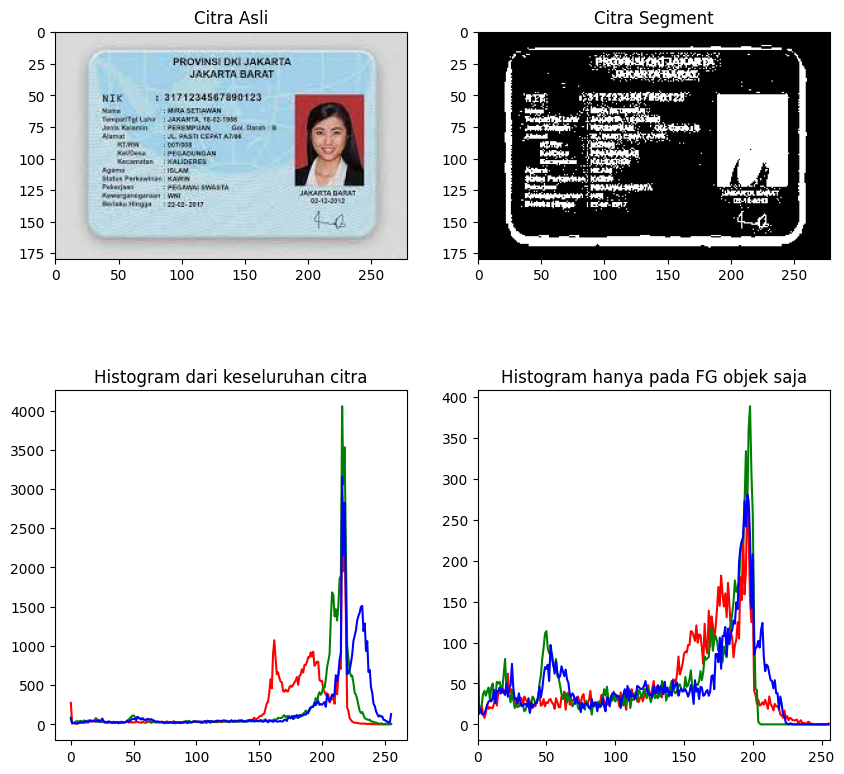

In [16]:
image_file = ('/content/drive/MyDrive/PCVK/img/ktp.jpg')
image = cv.imread(image_file)
image = cv.cvtColor(image,cv.COLOR_BGR2RGB)
image_gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
ret3, mask = cv.threshold(image_gray,200,255,cv.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))

plt.subplot(2,2,1),plt.imshow(image)
plt.title('Citra Asli')

plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')

color = ('r','g','b')
for i,col in enumerate(color):
  hist0 = cv.calcHist([image],[i],None,[256],[0,256])
  plt.subplot(2,2,3),plt.plot(hist0,color = col)
  plt.title('Histogram dari keseluruhan citra')

  hist1 = cv.calcHist([image],[i],mask,[256],[0,256])
  plt.subplot(2,2,4),plt.plot(hist1,color = col)
  plt.title('Histogram hanya pada FG objek saja')
  plt.xlim([0,256])

plt.show()

(<Axes: >, <matplotlib.image.AxesImage at 0x7b9e0f8f3d60>)

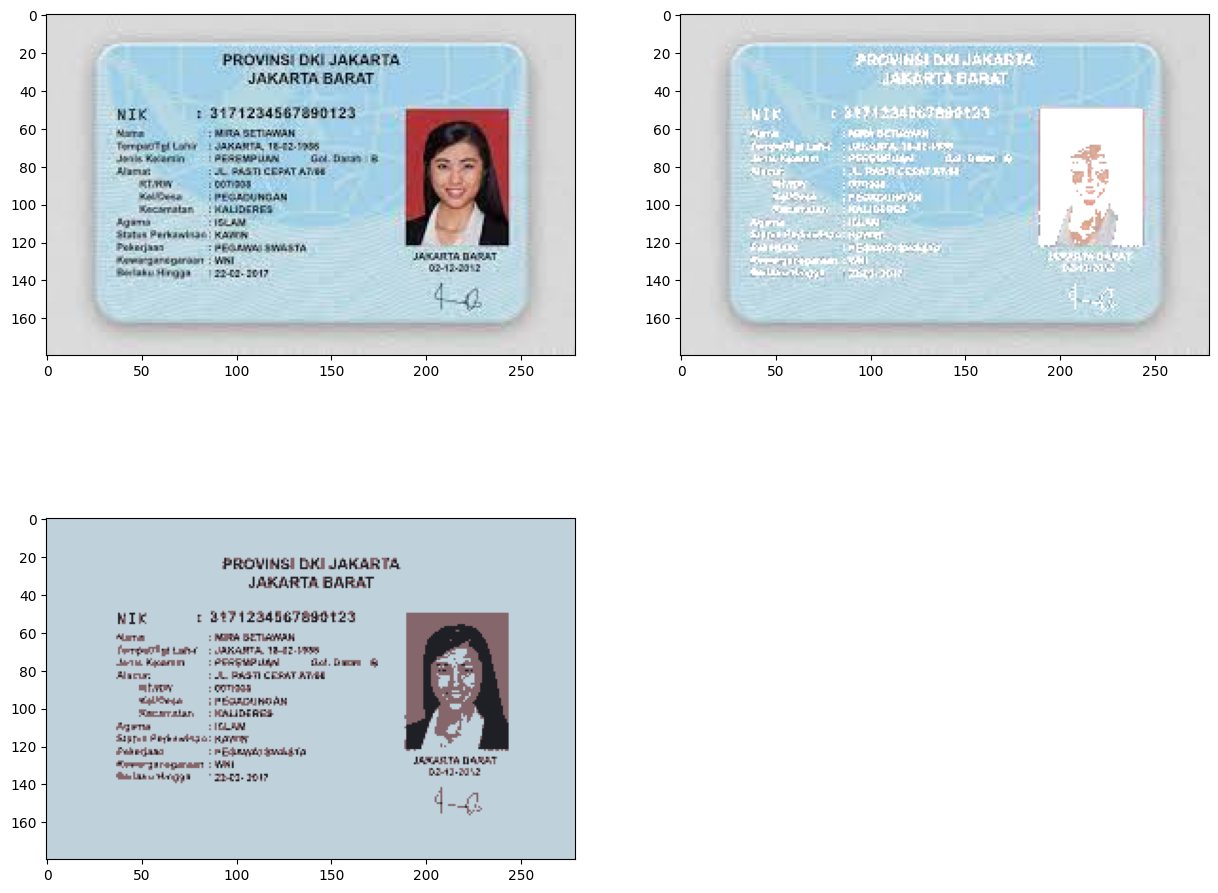

In [17]:
image_file = ('/content/drive/MyDrive/PCVK/img/ktp.jpg')
image = cv.imread(image_file)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 150, 0.1)

k = 3
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
labels = labels.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

masked_image = np.copy(image)
masked_image0 = masked_image.reshape((-1, 3))
masked_image0[labels != 1] = [255, 255, 255]
masked_image0 = masked_image0.reshape(image.shape)

plt.figure(figsize = (15,12))
plt.subplot(2,2,1),plt.imshow(image)
plt.subplot(2,2,2),plt.imshow(masked_image0)
plt.subplot(2,2,3),plt.imshow(segmented_image)

In [18]:
from pytesseract import Output

# manambahkan axis ke dalam object figure
def display(img,cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(image, cmap='gray')


In [45]:
# menyimpan teks ke dalam file
image = cv.imread('/content/drive/MyDrive/PCVK/img/ktp.jpg')
d = pytesseract.image_to_data(image, output_type=Output.DICT)
print(d.keys())

gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
th, threshed = cv.threshold(gray, 127, 255, cv.THRESH_TRUNC)
text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


TesseractError: ignored

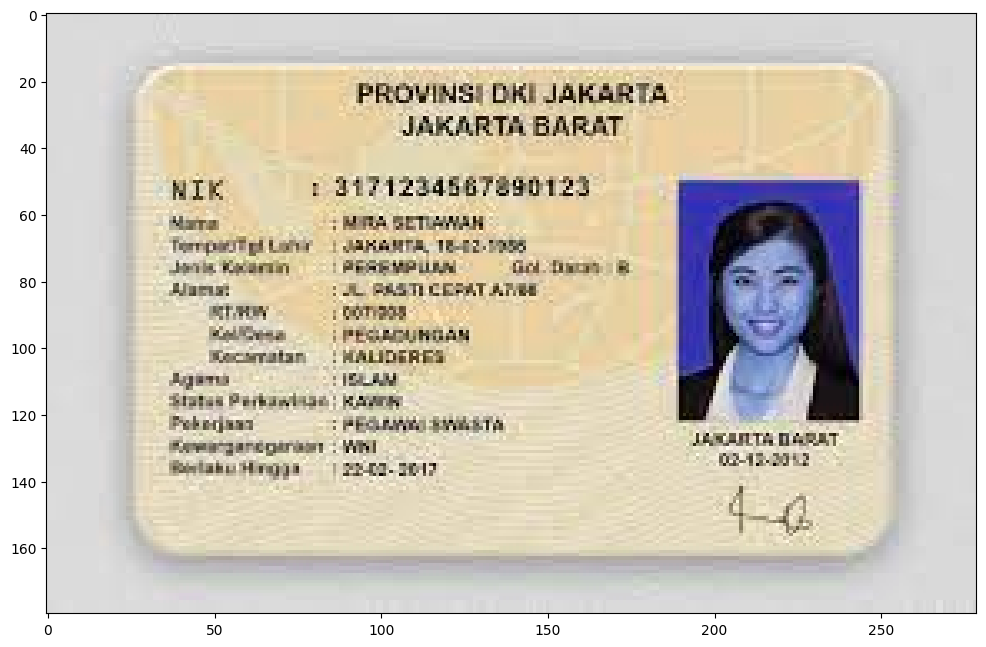

In [46]:
# menambahkan kotak untuk deteksi teks
n_boxes = len(text1['text'])

for i in range(n_boxes):
  if int(text1['conf'][i]) > 60:
    (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
    image = cv.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

display(image)

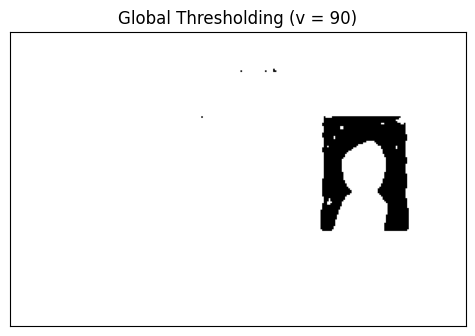

In [47]:
image = cv.imread('/content/drive/MyDrive/PCVK/img/ktp.jpg')
ret, th1 = cv.threshold(blur, 90, 255, cv.THRESH_BINARY)

plt.figure(figsize = (20,15))
plt.subplot(1,3,1), plt.imshow(th1,'gray')
plt.title('Global Thresholding (v = 90)')
plt.xticks([]), plt.yticks([])

plt.show()